In [11]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [12]:
darjelling = pd.read_csv('outer_data/data_Darjelling.csv')
goa = pd.read_csv('outer_data/data_Goa.csv')
gokarna = pd.read_csv('outer_data/data_Gokarna.csv')
manali = pd.read_csv('outer_data/data_Manali.csv')
munnar = pd.read_csv('outer_data/data_Munnar.csv')
ooty = pd.read_csv('outer_data/data_Ooty.csv')
pondi = pd.read_csv('outer_data/data_Pondicherry.csv')
shimla = pd.read_csv('outer_data/data_Shimla.csv')
banglore = pd.read_csv('outer_data/data_Banglore.csv')
mumbai = pd.read_csv('outer_data/data_Mumbai.csv')
hyderabad = pd.read_csv('outer_data/data_Hyderabad.csv')
delhi = pd.read_csv('outer_data/data_Delhi.csv')

In [13]:
darjelling1 = pd.read_csv('per_hotel_scrap/Darjelling.csv')
goa1 = pd.read_csv('per_hotel_scrap/Goa.csv')
gokarna1 = pd.read_csv('per_hotel_scrap/Gokarna.csv')
manali1 = pd.read_csv('per_hotel_scrap/Manali.csv')
munnar1 = pd.read_csv('per_hotel_scrap/Munnar.csv')
ooty1 = pd.read_csv('per_hotel_scrap/Ooty.csv')
pondi1 = pd.read_csv('per_hotel_scrap/Pondicherry.csv')
shimla1 = pd.read_csv('per_hotel_scrap/Shimla.csv')
banglore1 = pd.read_csv('per_hotel_scrap/Banglore.csv')
mumbai1 = pd.read_csv('per_hotel_scrap/Mumbai.csv')
hyderabad1 = pd.read_csv('per_hotel_scrap/Hyderabad.csv')
delhi1 = pd.read_csv('per_hotel_scrap/Delhi.csv')

In [14]:
hotels_outer = pd.concat([darjelling, goa, gokarna, manali, munnar, ooty, pondi, shimla, banglore, mumbai, hyderabad, delhi])

In [15]:
hotels_inner = pd.concat([darjelling1, goa1, gokarna1, manali1, munnar1, ooty1, pondi1, shimla1, banglore1, mumbai1, hyderabad1, delhi1])

In [16]:
hotels = pd.merge(hotels_outer, hotels_inner, on="url", how="inner")

In [17]:
hotels = hotels.drop('url', axis=1)

In [18]:
hotels.head()

,name,room_type,cancel_type,paymentType,bed_type,price,review,review_count,distance,address,checkin,checkout,city,review_score,facility,checkIn_time,checkOut_time
0,Hotel KASTURI PALACE & RESTAURANT DARJEELING,Deluxe Double Room,Free cancellation,No prepayment needed,1 double bed,"₹ 9,000",7.8,12,0.8 km from centre,Darjeeling,2025-07-01,2025-07-07,Darjelling,"{""Staff"": ""7.7"", ""Facilities"": ""7.7"", ""Cleanli...","[""Free WiFi"", ""Free parking"", ""Breakfast""]",05:00,NaN
1,Pahari Soul,Double Room,Free cancellation,NaN,1 double bed,"₹ 7,020",7.6,385,1.7 km from centre,Darjeeling,2025-07-01,2025-07-07,Darjelling,"{""Staff"": ""8.4"", ""Facilities"": ""7.7"", ""Cleanli...","[""Free WiFi"", ""Private parking"", ""Room service...",12:00,11:00
2,Haven Eleven Homestay,Family Double Room,NaN,NaN,"2 beds (1 double, 1 extra-large double)","₹ 19,794",9.2,14,0.9 km from centre,Darjeeling,2025-07-01,2025-07-07,Darjelling,"{""Staff"": ""10"", ""Facilities"": ""9.5"", ""Cleanlin...","[""Free WiFi"", ""Free parking"", ""Room service"", ...",14:00,NaN
3,Pineridge Hotel at Mall Road,Deluxe King Room,Free cancellation,NaN,1 extra-large double bed,"₹ 13,800",5.4,58,0.9 km from centre,Darjeeling,2025-07-01,2025-07-07,Darjelling,"{""Staff"": ""6.5"", ""Facilities"": ""5.4"", ""Cleanli...","[""Free WiFi"", ""Room service"", ""Non-smoking roo...",11:00,NaN
4,Hotel Broadway Annecy Darjeeling - Near Mall R...,Deluxe Double Room,Free cancellation,No prepayment needed,1 extra-large double bed,"₹ 13,194",7.4,15,400 m from centre,Darjeeling,2025-07-01,2025-07-07,Darjelling,"{""Location"": ""8.1"", ""Cleanliness"": ""8.0"", ""Val...",[],NaN,NaN


In [19]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6524 entries, 0 to 6523
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6524 non-null   object 
 1   room_type      6502 non-null   object 
 2   cancel_type    5635 non-null   object 
 3   paymentType    3883 non-null   object 
 4   bed_type       6470 non-null   object 
 5   price          6502 non-null   object 
 6   review         6524 non-null   float64
 7   review_count   6524 non-null   int64  
 8   distance       5563 non-null   object 
 9   address        6524 non-null   object 
 10  checkin        6524 non-null   object 
 11  checkout       6524 non-null   object 
 12  city           6524 non-null   object 
 13  review_score   6524 non-null   object 
 14  facility       6524 non-null   object 
 15  checkIn_time   2992 non-null   object 
 16  checkOut_time  1059 non-null   object 
dtypes: float64(1), int64(1), object(15)
memory usage: 86

In [20]:
hotels = hotels.dropna(subset=['price'])

In [21]:
# converting price to numeric

hotels['price'] = pd.to_numeric(hotels.price.str.replace('₹\xa0', '').str.replace(',', ''))

In [22]:
hotels['cancel_type'].value_counts()

cancel_type
Free cancellation       5561
No prepayment needed      74
Name: count, dtype: int64

In [23]:
# looks like some field of paymentType are included in cancel_type

hotels[hotels['cancel_type'] == 'No prepayment needed'].head()

,name,room_type,cancel_type,paymentType,bed_type,price,review,review_count,distance,address,checkin,checkout,city,review_score,facility,checkIn_time,checkOut_time
77,INDUS MOUNT ROYALE HOTEL - Mall Road,Deluxe Double Room,No prepayment needed,NaN,"2 beds (1 sofa bed, 1 large double)",22500,6.4,5,0.7 km from centre,Darjeeling,2025-07-01,2025-07-07,Darjelling,"{""Staff"": ""7.5"", ""Facilities"": ""6.6"", ""Cleanli...","[""Free WiFi"", ""Room service"", ""Non-smoking roo...",01:00,NaN
95,Alpenglow Homestay,Budget Double Room,No prepayment needed,NaN,1 large double bed,9000,8.0,1,1.1 km from centre,Darjeeling,2025-07-01,2025-07-07,Darjelling,"{""Staff"": ""8.8"", ""Facilities"": ""8.8"", ""Cleanli...","[""Free WiFi"", ""Room service"", ""Non-smoking roo...",00:00,NaN
109,Pranav Homestays,Double or Twin Room,No prepayment needed,NaN,2 extra-large double beds,54000,-1.0,-1,4 km from centre,Darjeeling,2025-07-01,2025-07-07,Darjelling,{},"[""Free WiFi"", ""Free parking"", ""Breakfast""]",NaN,NaN
117,Aarna Valaya,Standard Family Room,No prepayment needed,NaN,1 double bed,17442,7.0,1,450 m from centre,Darjeeling,2025-07-01,2025-07-07,Darjelling,{},"[""Family rooms"", ""Private parking"", ""Room serv...",NaN,NaN
148,"Sai Maple Eco Resort, Darjeeling",Standard Double Room,No prepayment needed,NaN,"2 beds (1 double, 1 futon)",12000,-1.0,-1,2.5 km from centre,Darjeeling,2025-07-01,2025-07-07,Darjelling,{},"[""Free parking"", ""Room service"", ""Family rooms...",08:00,NaN


In [24]:
# fixing mismatched value b/w cancel_type and payment type

hotels['paymentType'] = np.where(hotels['cancel_type'] == 'No prepayment needed', "No prepayment needed", hotels['paymentType'])

In [25]:
# using numeric flag for free cancel flag

hotels['free_cancel_flag'] = np.where(hotels['cancel_type'] == 'Free cancellation', 1, 0)

In [26]:
# using numeric flag for pre payment flag

hotels['no_prepayment_flag'] = np.where(hotels['paymentType'] == 'No prepayment needed', 1, 0)

In [27]:
# converting distance to numeric

distance_km = pd.to_numeric(
    hotels['distance'].str.replace(' km from centre', '', regex=False),
    errors='coerce'
)

distance_m = pd.to_numeric(
    hotels['distance'].str.replace(' m from centre', '', regex=False),
    errors='coerce'
)/1000

distance_m = pd.to_numeric(
    hotels['distance'].str.replace(' m from centre', '', regex=False),
    errors='coerce'
)/1000

hotels['distance'] =  np.where(hotels['distance'].str.contains(' m from centre'), distance_m, distance_km)

In [28]:
hotels['bed_type'].value_counts()

bed_type
1 double bed                                                                                                                       1015
1 large double bed                                                                                                                  754
1 extra-large double bed                                                                                                            523
2 double beds                                                                                                                       457
2 large double beds                                                                                                                 297
                                                                                                                                   ... 
Entire villa • 4 bedrooms • 4 bathrooms • 1 kitchen • 279 m²4 large double beds                                                       1
Private suite • 1 bedroom • 1 living ro

In [29]:
import re

def parse_bed_breakdown(breakdown):
    counts = {
        'single': 0,
        'double': 0,
        'queen': 0,
        'king': 0,
        'extra_large': 0,
        'sofa': 0,
        'bunk': 0
    }
    if pd.isna(breakdown):
        return pd.Series(counts)

    for match in re.findall(r'(\d+)\s+([a-zA-Z\- ]+)', breakdown.lower()):
        num, bed_type = match
        num = int(num)
        bed_type = bed_type.strip()
        
        # Normalize bed type
        if 'extra' in bed_type and 'large' in bed_type:
            counts['extra_large'] += num
        elif 'single' in bed_type:
            counts['single'] += num
        elif 'double' in bed_type:
            counts['double'] += num
        elif 'queen' in bed_type:
            counts['queen'] += num
        elif 'king' in bed_type:
            counts['king'] += num
        elif 'sofa' in bed_type:
            counts['sofa'] += num
        elif 'bunk' in bed_type:
            counts['bunk'] += num

    return pd.Series(counts)

bed_counts_df = hotels['bed_type'].apply(parse_bed_breakdown)

In [30]:
bed_counts_df.head()

,single,double,queen,king,extra_large,sofa,bunk
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [31]:
bed_counts_df[bed_counts_df['bunk'] > 1]

,single,double,queen,king,extra_large,sofa,bunk
666,0,0,0,0,0,0,4
795,0,0,0,0,1,0,2
819,0,0,0,0,0,0,4
839,0,0,0,0,1,0,2
976,0,0,0,0,0,0,25
1611,0,0,0,0,1,0,2
1955,0,0,0,0,0,0,2
1994,1,1,0,0,0,0,2
2072,0,2,0,0,0,0,2
2501,0,2,0,0,0,4,2


In [32]:
hotels = pd.concat([hotels, bed_counts_df], axis=1)

In [33]:
# get unique facility from facility column

facility_set = set()
import json

for fac in hotels['facility']:
    fac_list = json.loads(fac)
    for each_fac in fac_list:
        facility_set.add(each_fac)

print(facility_set)
print(len(facility_set))

{'Fast free WiFi (152 Mbps)', '2 swimming pools', 'Free parking', 'Fast free WiFi (350 Mbps)', 'Cot always available', 'Fast free WiFi (107 Mbps)', 'Family rooms', 'Spa and wellness centre (Temporarily closed)', 'Good free WiFi (43 Mbps)', 'Good free WiFi (42 Mbps)', 'Fast free WiFi (92 Mbps)', 'Fast free WiFi (205 Mbps)', 'Good free WiFi (46 Mbps)', 'Fast free WiFi (85 Mbps)', 'WiFi', 'Free WiFi', 'Terrace', 'Fast free WiFi (120 Mbps)', 'Fast free WiFi (90 Mbps)', 'Fast free WiFi (235 Mbps)', 'Air conditioning', 'Good free WiFi (44 Mbps)', 'Good free WiFi (28 Mbps)', 'Fast free WiFi (213 Mbps)', 'Superb breakfast', 'Fast free WiFi (242 Mbps)', 'Free cot always available', 'Fast free WiFi (84 Mbps)', 'Good free WiFi (27 Mbps)', '7 restaurants', 'Fast free WiFi (268 Mbps)', 'Fast free WiFi (153 Mbps)', 'Basic free WiFi (12 Mbps)', 'Pool  - outdoor (kids)', 'Fast free WiFi (290 Mbps)', 'Fast free WiFi (148 Mbps)', 'Good free WiFi (47 Mbps)', 'Fast free WiFi (101 Mbps)', 'Daily housekeepi

In [34]:
facility_list1 = []

# getting occurence count of each facility

for fac in hotels['facility']:
    fac_list = json.loads(fac)
    for each_fac in fac_list:
        if ("WiFi" in each_fac):
            facility_list1.append("WiFi")
        elif "reakfast" in each_fac:
            facility_list1.append("Breakfast")
        elif "ool" in each_fac:
            facility_list1.append("Pool")
        else:
            facility_list1.append(each_fac)

fac_list_count = {}

for fac in facility_list1:
    if fac in fac_list_count:
        fac_list_count[fac] += 1
    else:
        fac_list_count[fac] = 1

print(sorted(fac_list_count.items(), key=lambda x: x[1], reverse=True))

[('WiFi', 3074), ('Free parking', 2913), ('Family rooms', 2734), ('Room service', 2377), ('Non-smoking rooms', 2307), ('Breakfast', 2053), ('Restaurant', 994), ('Airport shuttle', 968), ('24-hour front desk', 968), ('Tea/coffee maker in all rooms', 680), ('Pool', 629), ('Air conditioning', 543), ('Bar', 397), ('Laundry', 384), ('Fitness centre', 370), ('Daily housekeeping', 299), ('Free cot available on request', 297), ('Facilities for disabled guests', 296), ('Terrace', 262), ('Spa and wellness centre', 197), ('BBQ facilities', 149), ('Lift', 110), ('Beachfront', 109), ('2 restaurants', 88), ('Airport shuttle (free)', 88), ('Heating', 84), ('Cot available on request', 82), ('Private parking', 79), ('Garden', 56), ('Parking', 31), ('Private beach area', 29), ("Children's cots (upon request)", 24), ('Parking on site', 21), ('3 restaurants', 20), ('Free cot always available', 11), ('4 restaurants', 9), ('6 restaurants', 5), ('Cot always available', 4), ('Restaurant (Temporarily closed)',

In [35]:
def parse_facility(facility):
    facility_list = json.loads(facility)
    counts = {
        'free_wifi' : 0,
        'free_parking' : 0,
        'breakfast' : 0,
        'room_service' : 0,
        'bar' : 0,
        'airport_shuttle' : 0,
        "restaurant" : 0,
        "pool" : 0,
        "family_rooms" : 0,
        "other_facility" : 0
        
    }

    for fac in facility_list:
        if "WiFi" in fac:
            counts['free_wifi'] = 1
        elif "reakfast" in fac:
            counts["breakfast"] = 1
        elif "ool" in fac:
            counts["pool"] = 1
        elif "Free parking" in fac:
            counts['free_parking'] = 1
        elif "Breakfast" in fac or "Good Breakfast" in fac:
            counts['breakfast'] = 1
        elif "Room service" in fac:
            counts['room_service'] = 1
        elif "Bar" in fac:
            counts["bar"] = 1
        elif "Airport shuttle" in fac:
            counts["airport_shuttle"] = 1
        else:
            counts["other_facility"] = 1
            
    
    return pd.Series(counts)

fac_list = hotels['facility'].apply(parse_facility)

In [36]:
fac_list.head()

,free_wifi,free_parking,breakfast,room_service,bar,airport_shuttle,restaurant,pool,family_rooms,other_facility
0,1,1,1,0,0,0,0,0,0,0
1,1,0,1,1,1,1,0,0,0,1
2,1,1,1,1,0,1,0,0,0,1
3,1,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0


In [37]:
hotels = pd.concat([hotels, fac_list], axis=1)

In [38]:
# getting unique criteria on rating

unique_citeria = []

for reviews in hotels['review_score']:
    review = json.loads(reviews)
    unique_citeria.extend(list(review.keys()))

print(set(unique_citeria))

{'Staff', 'Cleanliness', 'Value_for_money', 'Location', 'Comfort', 'Facilities', 'Free_WiFi'}


In [39]:
def parse_review(reviews):
    review = json.loads(reviews)
    counts = {
            'Staff' : 0, 
            'Cleanliness' : 0, 
            'Free_WiFi' : 0, 
            'Location' : 0, 
            'Facilities' : 0, 
            'Comfort' : 0, 
            'Value_for_money' : 0
             }

    for key, val in review.items():
        counts[key] = pd.to_numeric(val)
    
    return pd.Series(counts)

review_score_list = hotels['review_score'].apply(parse_review)

In [40]:
review_score_list.head()

,Staff,Cleanliness,Free_WiFi,Location,Facilities,Comfort,Value_for_money
0,7.7,7.8,0.0,7.2,7.7,7.8,7.5
1,8.4,8.0,8.1,8.2,7.7,8.1,8.1
2,10.0,9.8,10.0,9.8,9.5,9.8,9.6
3,6.5,5.8,6.3,8.7,5.4,6.0,6.2
4,0.0,8.0,0.0,8.1,0.0,0.0,7.8


In [41]:
hotels = pd.concat([hotels, review_score_list], axis=1)

In [42]:
np.mean(hotels['distance'])

np.float64(6.877387330806713)

In [43]:
hotels['distance'] = np.where(hotels['distance'].isna(), 6.9, hotels['distance'])

In [44]:
# mapping city with its type

city_map = {
    "Banglore" : "Metro",
    "Darjelling" : "Hill",
    "Delhi" : "Metro",
    "Goa" : "Beach",
    "Gokarna" : "Beach",
    "Hyderabad" : "Metro",
    "Manali" : "Hill",
    "Mumbai" : "Metro",
    "Munnar" : "Hill",
    "Ooty" : "Hill",
    "Pondicherry" : "Beach",
    "Shimla" : "Hill"
}

hotels['location_type'] = hotels['city'].map(city_map)

In [45]:
loc_type_dummy = pd.get_dummies(hotels['location_type'], drop_first=True, dtype=int)

In [46]:
loc_type_dummy.head()

,Hill,Metro
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [47]:
hotels = pd.concat([hotels, loc_type_dummy], axis=1)

In [48]:
hotels['room_type'].value_counts()[0:10]

room_type
Deluxe Room                611
Deluxe Double Room         456
Two-Bedroom Apartment      342
Double Room                332
One-Bedroom Apartment      318
Standard Double Room       262
Three-Bedroom Apartment    156
Family Room                156
Classic Triple Room        137
Villa                      124
Name: count, dtype: int64

In [49]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6502 entries, 0 to 6523
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6502 non-null   object 
 1   room_type           6502 non-null   object 
 2   cancel_type         5635 non-null   object 
 3   paymentType         3953 non-null   object 
 4   bed_type            6470 non-null   object 
 5   price               6502 non-null   int64  
 6   review              6502 non-null   float64
 7   review_count        6502 non-null   int64  
 8   distance            6502 non-null   float64
 9   address             6502 non-null   object 
 10  checkin             6502 non-null   object 
 11  checkout            6502 non-null   object 
 12  city                6502 non-null   object 
 13  review_score        6502 non-null   object 
 14  facility            6502 non-null   object 
 15  checkIn_time        2984 non-null   object 
 16  checkOut_ti

In [50]:
def parse_room(room_type):
    counts = {
        'double_room' : 0,
        'villa_room' : 0,
        'deluxe_room' : 0,
        'family_room' : 0,
        'queen_room' : 0,
        'king_room' : 0,
        'other_room' : 0
        
    }
    
    if "Villa" in room_type:
        counts['villa_room'] = 1
    if "Family" in room_type:
        counts["family_room"] = 1
    if "Deluxe" in room_type:
        counts["deluxe_room"] = 1
    if "Queen" in room_type:
        counts['queen_room'] = 1
    if "King" in room_type:
        counts['king_room'] = 1
    if "Double" in room_type:
        counts['double_room'] = 1
    else:
        counts['other_room'] = 1
    
    return pd.Series(counts)

room_type_df = hotels['room_type'].apply(parse_room)

In [51]:
hotels = pd.concat([hotels, room_type_df], axis=1)

In [52]:
np.mean(hotels['review_count'])

np.float64(36.97616118117502)

In [53]:
hotels['review_count'] = np.where(hotels['review_count'] == -1, 37, hotels['review_count'])

In [54]:
np.mean(hotels['review'])

np.float64(3.1147185481390345)

In [55]:
hotels['review'] = np.where(hotels['review'] == -1, 3.1, hotels['review'])

# EDA

In [56]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6502 entries, 0 to 6523
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6502 non-null   object 
 1   room_type           6502 non-null   object 
 2   cancel_type         5635 non-null   object 
 3   paymentType         3953 non-null   object 
 4   bed_type            6470 non-null   object 
 5   price               6502 non-null   int64  
 6   review              6502 non-null   float64
 7   review_count        6502 non-null   int64  
 8   distance            6502 non-null   float64
 9   address             6502 non-null   object 
 10  checkin             6502 non-null   object 
 11  checkout            6502 non-null   object 
 12  city                6502 non-null   object 
 13  review_score        6502 non-null   object 
 14  facility            6502 non-null   object 
 15  checkIn_time        2984 non-null   object 
 16  checkOut_ti

## Feature Target relationship

In [57]:
# price graph based on location_type

<Axes: xlabel='location_type'>

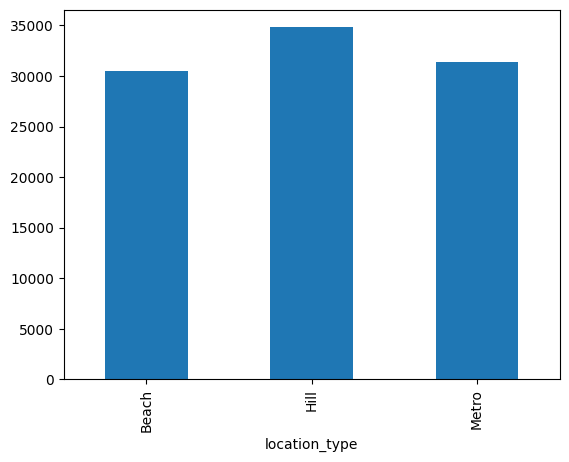

In [58]:
hotels.groupby('location_type')['price'].mean().plot.bar()

No major price difference between location type

<Axes: xlabel='city'>

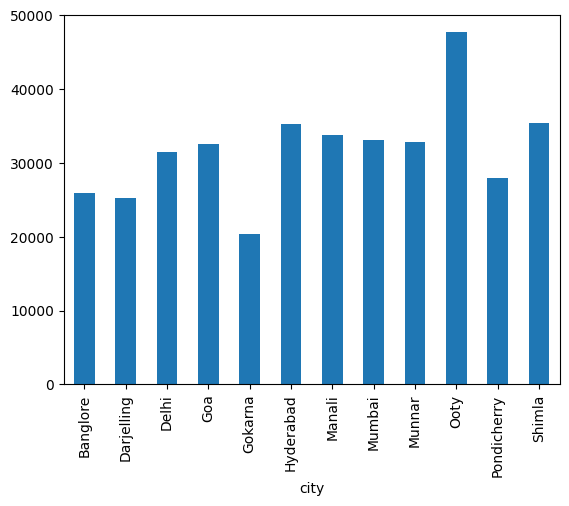

In [59]:
hotels.groupby('city')['price'].mean().plot.bar()

Ooty has highest hotel price and Gokarna has lowest

<Axes: xlabel='no_prepayment_flag'>

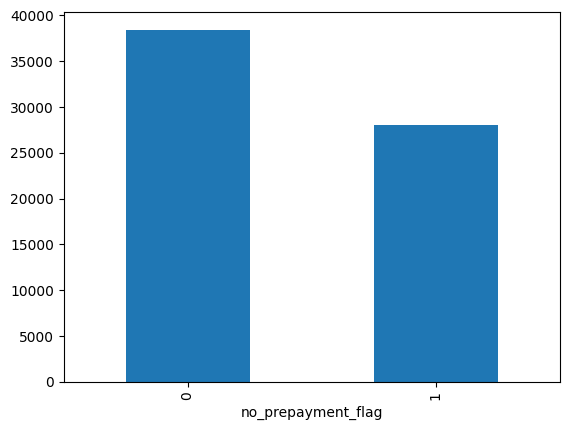

In [60]:
hotels.groupby('no_prepayment_flag')['price'].mean().plot.bar()

<Axes: xlabel='free_cancel_flag'>

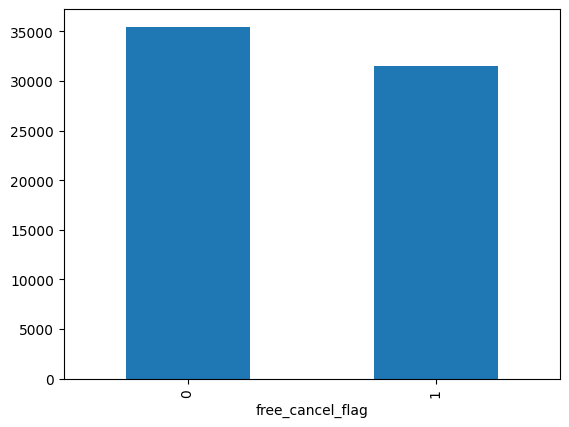

In [61]:
hotels.groupby('free_cancel_flag')['price'].mean().plot.bar()

In [62]:
hotels["hotels_facility_count"] =  hotels['free_wifi'] + hotels['free_parking'] + hotels['breakfast'] + hotels['room_service'] + hotels['bar'] + hotels['airport_shuttle'] + hotels['restaurant'] + hotels['pool'] + hotels['family_rooms'] + hotels['other_facility']

<Axes: xlabel='hotels_facility_count'>

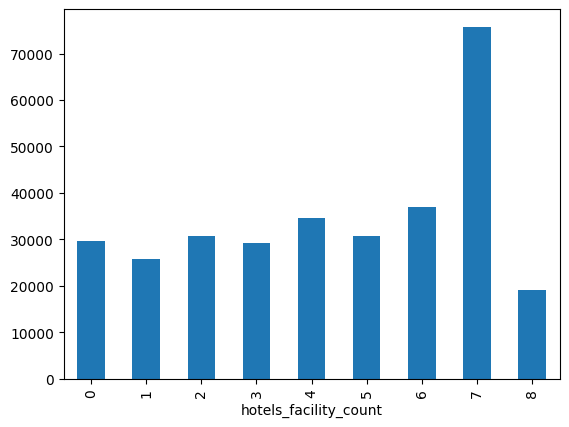

In [63]:
hotels.groupby('hotels_facility_count')['price'].mean().plot.bar()

In [64]:
# detecting outlier in price

def remove_outlier(key):
    Q1 = hotels[key].quantile(0.25)
    Q3 = hotels[key].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = hotels[(hotels[key] < Q1 - 1.5 * IQR) | (hotels[key] > Q3 + 1.5 * IQR)]
    print(outliers[[key]])
    # replacing price with boundary value
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    hotels[key] = hotels[key].clip(lower, upper)

In [65]:
remove_outlier('price')

       price
111   138000
176   101916
185   106500
224   240000
227   108000
...      ...
5936   84150
5944   90265
5958   76252
5984   70195
5997   82200

[486 rows x 1 columns]


In [66]:
remove_outlier('review')

Empty DataFrame
Columns: [review]
Index: []


In [67]:
remove_outlier('review_count')

      review_count
1              385
3               58
5               57
6                2
7                5
...            ...
3928             3
3932             2
3934             1
3943             1
3945             1

[2220 rows x 1 columns]


In [68]:
remove_outlier('distance')

      distance
182       20.6
214       22.6
311       22.1
1466      23.8
1512      20.3
...        ...
5732      20.8
5753      21.1
5991      19.6
6360      19.6
6379      19.6

[166 rows x 1 columns]


In [69]:
hotels['distance'].describe()

count    6502.000000
mean        6.671363
std         4.963274
min         0.003200
25%         2.400000
50%         6.750000
75%         9.200000
max        19.400000
Name: distance, dtype: float64

In [70]:
# binning distance prioritizing short distance over long

bins = [0, 2, 4, 9, 20]
labels = [4, 3, 2, 1]
hotels['distance_category'] = pd.cut(hotels['distance'], bins=bins, labels=labels)

In [71]:
hotels[hotels['distance_category'].isna()]

,name,room_type,cancel_type,paymentType,bed_type,price,review,review_count,distance,address,...,Metro,double_room,villa_room,deluxe_room,family_room,queen_room,king_room,other_room,hotels_facility_count,distance_category


/var/folders/mg/s0_mb30d0k1brm1ws34ktsy40000gn/T/ipykernel_16657/1332527756.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotels.groupby('distance_category')['price'].mean().plot.bar()


<Axes: xlabel='distance_category'>

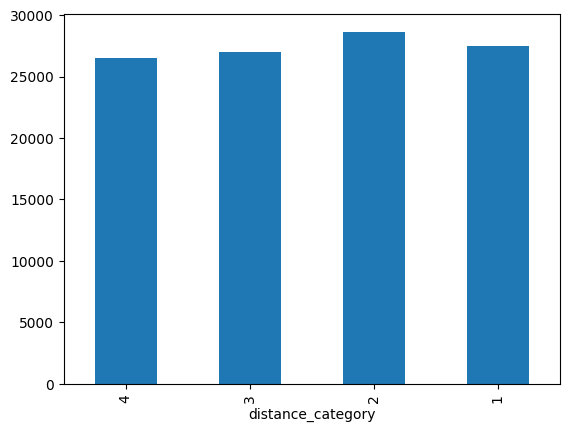

In [72]:
hotels.groupby('distance_category')['price'].mean().plot.bar()

<Axes: xlabel='distance', ylabel='price'>

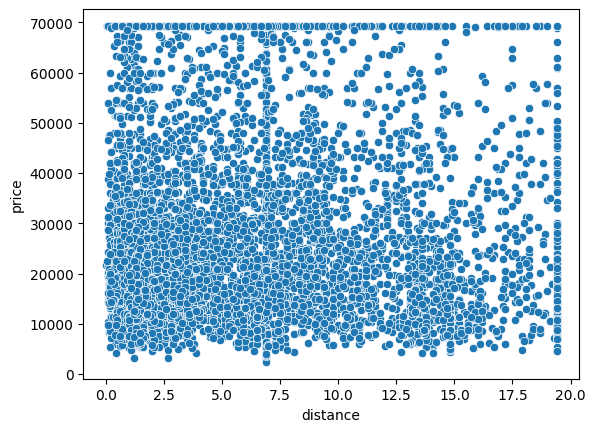

In [73]:
import seaborn as sns
sns.scatterplot(x=hotels['distance'], y=hotels['price'])

<Axes: xlabel='distance_category', ylabel='Count'>

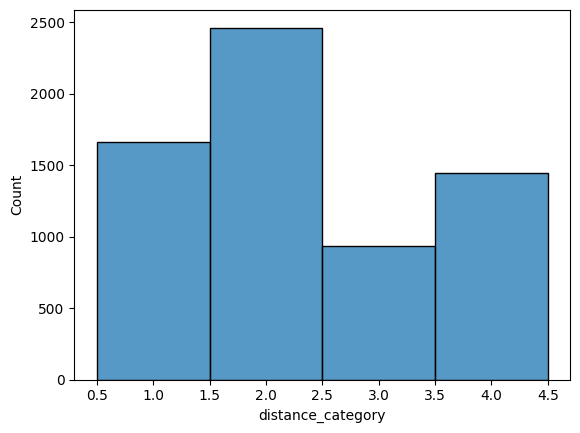

In [74]:
sns.histplot(hotels["distance_category"])

<Axes: xlabel='review', ylabel='price'>

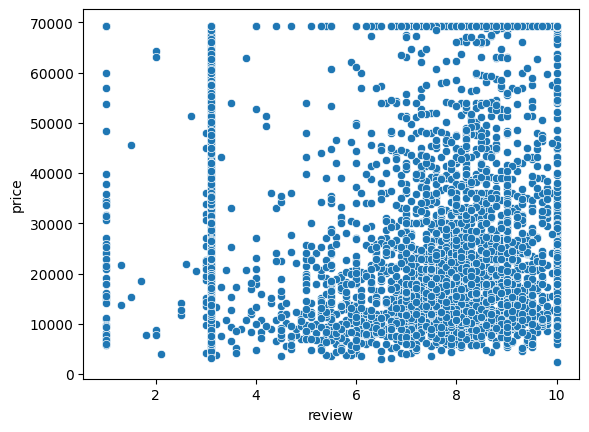

In [75]:
sns.scatterplot(x=hotels['review'], y=hotels['price'])

<Axes: xlabel='price', ylabel='Count'>

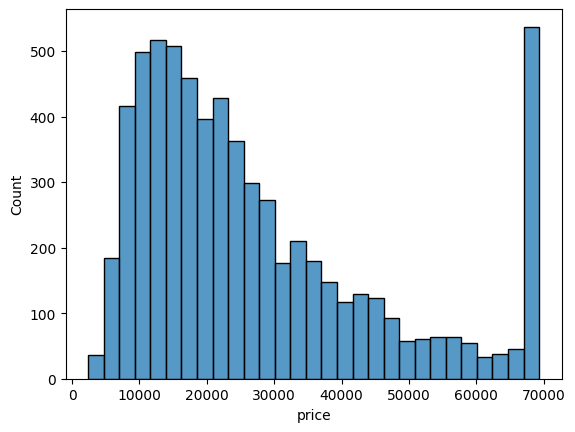

In [76]:
sns.histplot(hotels["price"])

## Takeaways from EDA

1. No major price difference between Location type -- Beach, Hill, Metro
2. Ooty has highest hotels price while gokarna has lowest
3. Hotels in which prepayment is not needed has more price than hotels in which pre payment is needed
4. Hotels which has free cancellation has more price
5. Hotels in which number of facilities is 7 has highest, weirdly hotels that has 8 facility has lowest price
6. Price does not seem to be dependent on distance category
7. Distance from 1.5 to 2.5 has most number of hotels
8. Most of the high price hotels are in review > 4
9. Removed some outliers in Price, Distance, Review Count by replacing with boundary value

## Modelling

In [77]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6502 entries, 0 to 6523
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   name                   6502 non-null   object  
 1   room_type              6502 non-null   object  
 2   cancel_type            5635 non-null   object  
 3   paymentType            3953 non-null   object  
 4   bed_type               6470 non-null   object  
 5   price                  6502 non-null   int64   
 6   review                 6502 non-null   float64 
 7   review_count           6502 non-null   int64   
 8   distance               6502 non-null   float64 
 9   address                6502 non-null   object  
 10  checkin                6502 non-null   object  
 11  checkout               6502 non-null   object  
 12  city                   6502 non-null   object  
 13  review_score           6502 non-null   object  
 14  facility               6502 non-null   object

In [78]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

hotels = hotels.assign(
    distance_2 = hotels["distance"] ** 2,
    distance_3 = hotels["distance"] ** 3
)

hotels = hotels.assign(
    Staff_2 = hotels["Staff"] ** 2,
    value_for_money_2 = hotels["Value_for_money"] ** 2
)

hotels = hotels.assign(
    total_bed = (
        hotels['single'] + hotels['double'] + hotels['queen'] + hotels['king'] + hotels['extra_large'] +
        hotels['sofa'] + hotels['bunk']
    )
)

feature = ['no_prepayment_flag', 'distance', 'review',
       'pool', 'Hill', 'Metro', 'Staff', 'Cleanliness', 'Value_for_money','distance_category',
          'single', 'double', 'bunk', 'sofa', 'extra_large',
          'room_service', 'bar', 'villa_room', 'deluxe_room', 'family_room', 'king_room', 'other_room',
          'distance_2', 'distance_3', 'Staff_2', 'value_for_money_2']

X3 = sm.add_constant(hotels[feature])
y3 = np.log(hotels["price"])

X, X_test, y, y_test = train_test_split(X3, y3, test_size=.2, random_state=2023)

In [79]:
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     77.12
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        23:17:24   Log-Likelihood:                -4320.9
No. Observations:                5201   AIC:                             8696.
Df Residuals:                    5174   BIC:                             8873.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.5041      0.147     71.299      0.000      10.215      10.793
no_prepayment_flag    -0.1715      0.017    -10.272      0.000      -0.204      -0.139
distance              -0.0132      0.021     -0.636      0.525      -0.054       0.027
review                -0.0365      0.004     -8.471      0.000      -0.045      -0.028
pool                   0.4320      0.031     14.159      0.000       0.372       0.492
Hill                   0.3741      0.025     14.981      0.000       0.325       0.423
Metro                  0.2289      0.026      8.949      0.000       0.179       0.279
Staff                 -0.1945      0.021     -9.104      0.000      -0.236      -0.153
Cleanliness            0.1420      0.016      8.715      0.000       0.110       0.174
Value_for_money       -0.0625      0.030     -2.056      0.040      -0.122      -0.003
distance_category     -0.1464      0.031     -4.667      0.000      -0.208      -0.085
single                 0.0357      0.009      3.844      0.000       0.018       0.054
double                 0.0191      0.004      4.376      0.000       0.011       0.028
bunk                  -0.0647      0.018     -3.639      0.000      -0.099      -0.030
sofa                   0.0254      0.015      1.748      0.081      -0.003       0.054
extra_large            0.0542      0.009      5.788      0.000       0.036       0.073
room_service          -0.0714      0.020     -3.596      0.000      -0.110      -0.032
bar                    0.2706      0.037      7.370      0.000       0.199       0.343
villa_room             0.6004      0.035     17.356      0.000       0.533       0.668
deluxe_room           -0.1299      0.018     -7.258      0.000      -0.165      -0.095
family_room           -0.1220      0.034     -3.596      0.000      -0.189      -0.055
king_room              0.0809      0.036      2.246      0.025       0.010       0.151
other_room             0.1157      0.018      6.321      0.000       0.080       0.152
distance_2            -0.0051      0.002     -2.830      0.005      -0.009      -0.002
distance_3             0.0002   5.91e-05      4.020      0.000       0.000       0.000
Staff_2                0.0202      0.002      8.788      0.000       0.016       0.025
value_for_money_2     -0.0079      0.002     -3.698      0.000      -0.012      -0.004
==============================================================================
Omnibus:                        7.213   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                6.990
Skew:                          -0.068   Prob(JB):                       0.0304
Kurtosis:                       2.882   Cond. No.                     3.63e+04
==============================================================================

In [80]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2

def cross_val(X, y, n_splits):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=2023)
    # Create a list to store validation scores for each fold

    cv_lm_tr_r2s = []
    cv_lm_val_r2s = []
    
    for train_ind, val_ind in kf.split(X, y):
        # Subset data based on CV folds
        X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
        X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
        # Fit the Model on fold's training data
        model = sm.OLS(y_train, X_train).fit()
        # Append Validation score to list 
        cv_lm_tr_r2s.append(r2(y_train, model.predict(X_train)))
        cv_lm_val_r2s.append(r2(y_val, model.predict(X_val),))
        
        
    print(f"All Training R2s: {[round(x, 3) for x in cv_lm_tr_r2s]}")
    print(f"Training R2s: {round(np.mean(cv_lm_tr_r2s), 3)} +- {round(np.std(cv_lm_tr_r2s), 3)}")
            
    print(f"All Validation R2s: {[round(x, 3) for x in cv_lm_val_r2s]}")
    print(f"Cross Val R2s: {round(np.mean(cv_lm_val_r2s), 3)} +- {round(np.std(cv_lm_val_r2s), 3)}")

    return model
    
model = cross_val(X, y, 5)

All Training R2s: [0.277, 0.283, 0.282, 0.281, 0.28]
Training R2s: 0.281 +- 0.002
All Validation R2s: [0.282, 0.253, 0.258, 0.267, 0.272]
Cross Val R2s: 0.266 +- 0.01


## Model Assumptions

In [81]:
def residual_analysis_plots(model):
    
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    
    predictions = model.predict()
    residuals = model.resid
    
    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))
    
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")
    
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot") 

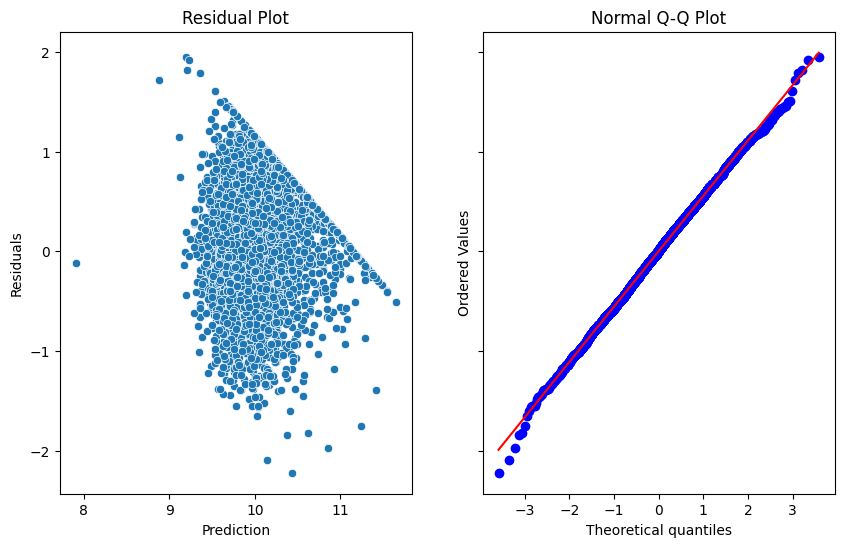

In [82]:
residual_analysis_plots(model)

In [83]:

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

pd.Series(
    [vif(X.values, i) for i in range(X.shape[1])],
    index=X.columns
)

const                 364.122147
no_prepayment_flag      1.117106
distance              179.819355
review                  2.130871
pool                    1.383554
Hill                    2.041030
Metro                   2.742959
Staff                 130.717943
Cleanliness            80.303010
Value_for_money       265.534898
distance_category      19.614979
single                  1.032033
double                  1.074555
bunk                    1.008494
sofa                    1.175035
extra_large             1.081104
room_service            1.544143
bar                     1.316896
villa_room              1.256721
deluxe_room             1.110237
family_room             1.088990
king_room               1.089043
other_room              1.221663
distance_2            454.269252
distance_3            152.835457
Staff_2               121.132682
value_for_money_2     103.538121
dtype: float64

In [84]:
influence = model.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df["cooks_d"].sort_values(ascending=False).head()

5555    0.055358
3714    0.049743
5441    0.046660
976     0.029823
5583    0.021947
Name: cooks_d, dtype: float64

In [85]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid)

np.float64(2.064980539711366)

# Takeaway

1. Linearity of relationship -- Prediction-residual plot seems normally distributed around 0
2. Normality of residual -- Q-Q plot seems good
3. No Multicolinearity -- VIF > 10 only in case of feature scalling or combining
4. Independence of Residual -- Durbin Watson is near 2
5. Outliers -- all cooks d < 0.5

In [86]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_m = std.fit_transform(X.values)
X_te = std.transform(X_test.values)

In [87]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error as mae

n_alphas = 200
alphas = 10 ** np.linspace(-3, 3, n_alphas)

ridge_model = RidgeCV(alphas=alphas, cv=5)

ridge_model.fit(X_m, y)
print(ridge_model.score(X_te, y_test))

0.23772734059839473
